## Download dataset

In [2]:
!pip install kagglehub

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 8.91k/8.91k [00:00<00:00, 13.6MB/s]

Extracting files...
Path to dataset files: /Users/kaushal/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
rm -rf /Users/kaushal/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("diabetes.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Prepare the model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [23]:
X_train.shape

(614, 8)

In [24]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=8, name='hidden_layer_1'))
model.add(Dense(8, activation='relu', name='hidden_layer_2'))

model.add(Dense(1, activation='sigmoid', name='output_layer'))

model.summary()

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=600)
history = history.history

Epoch 1/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3337 - loss: 0.7849 - val_accuracy: 0.3659 - val_loss: 0.7625
Epoch 2/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3479 - loss: 0.7492 - val_accuracy: 0.3659 - val_loss: 0.7318
Epoch 3/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4242 - loss: 0.7192 - val_accuracy: 0.4390 - val_loss: 0.7101
Epoch 4/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 0.7093 - val_accuracy: 0.5366 - val_loss: 0.6942
Epoch 5/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5981 - loss: 0.6824 - val_accuracy: 0.6098 - val_loss: 0.6813
Epoch 6/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6414 - loss: 0.6689 - val_accuracy: 0.6341 - val_loss: 0.6687
Epoch 7/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.6564 - val_accuracy: 0.6667 - val_loss: 0.6568
Epoch 8/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.6460 - val_accuracy: 0.6829 - v

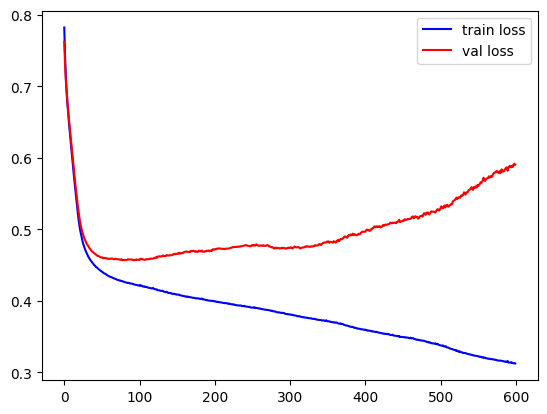

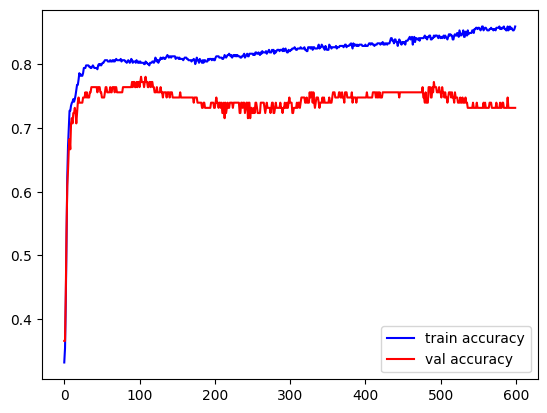

In [28]:
plt.plot(history['loss'], label='train loss', color='blue')
plt.plot(history['val_loss'], label='val loss', color='red')
plt.legend()
plt.show()

plt.plot(history['accuracy'], label='train accuracy', color='blue')
plt.plot(history['val_accuracy'], label='val accuracy', color='red')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7207792207792207

In [34]:
model1 = Sequential(name='model_2')

model1.add(Dense(8, activation='relu', input_dim=8, name='hidden_layer_1'))
model1.add(Dense(8, activation='relu', name='hidden_layer_2'))
model1.add(Dense(8, activation='relu', name='hidden_layer_3'))
model1.add(Dense(8, activation='relu', name='hidden_layer_4'))

model1.add(Dense(1, activation='sigmoid', name='output_layer'))

model1.summary()

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297 (1.16 KB)

 Trainable params: 297 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=100)
history = history.history

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6843 - loss: 0.6855 - val_accuracy: 0.6423 - val_loss: 0.6796
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.6748 - val_accuracy: 0.6423 - val_loss: 0.6629
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6465 - loss: 0.6858 - val_accuracy: 0.6423 - val_loss: 0.6508
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.6499 - val_accuracy: 0.6423 - val_loss: 0.6409
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.6362 - val_accuracy: 0.6423 - val_loss: 0.6318
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - loss: 0.6224 - val_accuracy: 0.6423 - val_loss: 0.6240
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.6143 - val_accuracy: 0.6423 - val_loss: 0.6157
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.5813 - val_accuracy: 0.6423 - v

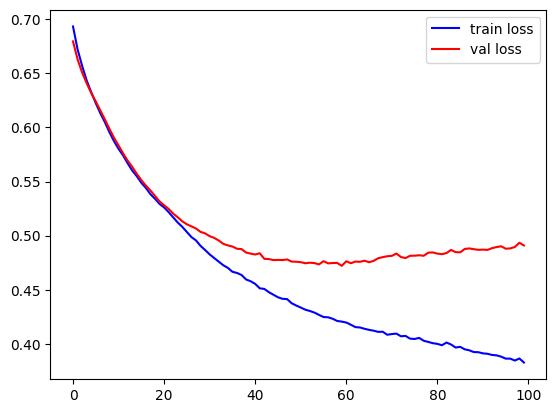

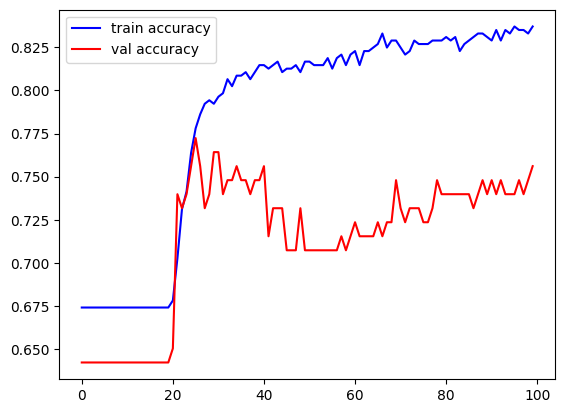

In [36]:
plt.plot(history['loss'], label='train loss', color='blue')
plt.plot(history['val_loss'], label='val loss', color='red')
plt.legend()
plt.show()

plt.plot(history['accuracy'], label='train accuracy', color='blue')
plt.plot(history['val_accuracy'], label='val accuracy', color='red')
plt.legend()
plt.show()

In [37]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7207792207792207